<a href="https://colab.research.google.com/github/yoonyoung27/prac_python/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.
(a) 분산과 편향의 tradeoff에 관해 설명하시오.

편향은 훈련 데이터와 예측값의 차이값을 뜻하고 분산은 테스트 데이터와 예측값의 차이값을 뜻하는데  
모델의 복잡도가 늘어나면 분산이 커지고 편향이 줄어들고, 그 반대의 경우 편향이 커기조 분산이 줄어드는 trade off의 관계를 가진다.

(b) sklearn의 diabetes 데이터를 불러오고 선형회귀를 실행해보자. 또한 Ridge와 Lasso 회귀를 실행하고 하이퍼 파라미터를 조정해보자.

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

In [ ]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [ ]:
X = diabetes.data
y = diabetes.target

In [ ]:
X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.intercept_, lin_reg.coef_

(152.76430691633442,
 array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
        -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
         7.43519617e+02,  7.60951722e+01]))

In [ ]:
lin_reg.score(X_train, y_train)
lin_reg.score(X_test, y_test)

0.5850753022690574

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg_0 = Ridge(alpha=0, solver='cholesky')
ridge_reg_0.fit(X_train,y_train)

ridge_reg_1 = Ridge(alpha=1, solver='cholesky')
ridge_reg_1.fit(X_train,y_train)

ridge_reg_100 = Ridge(alpha=100, solver='cholesky')
ridge_reg_100.fit(X_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [ ]:
print(ridge_reg_0.score(X_test, y_test),
      ridge_reg_1.score(X_test, y_test),
      ridge_reg_100.score(X_test, y_test))

0.45260660216173826 0.4191532397912693 0.012171837445885458


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg_0 = Lasso(alpha=0)
lasso_reg_0.fit(X_train,y_train)

lasso_reg_1 = Ridge(alpha=1)
lasso_reg_1.fit(X_train,y_train)

lasso_reg_100 = Ridge(alpha=100, solver='cholesky')
lasso_reg_100.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506298.47211422364, tolerance: 214.49684985835697
  positive)


Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [ ]:
print(lasso_reg_0.score(X_test, y_test),
      lasso_reg_1.score(X_test, y_test),
      lasso_reg_100.score(X_test, y_test))

0.4526066022334356 0.4191532397912693 0.012171837445885458


#9.
(a) valid kernel이란 무엇인지 설명하시오.

어떤 kernel에 대하여 image.png인 feature map image.png이 존재하여 image.png가 성립하는 kernel을 valid kernel이라고 한다.

(b) 적절히 MOONS 데이터 셋을 생성하고 SVC 와 gaussian kernel을 사용하여 분류기를 만들어보자. 정확도를 높이도록 매개변수를 조정해 보자.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [15]:
X, y = make_moons(n_samples=500, noise=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

#12.
(a) SVM 알고리즘은 어떤 양의 최적화 문제로 바꾸어 이야기할 수 있는지 설명하시오.

SVM 알고리즘은 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제로 바꾸어 이야기 할 수 있다. 이를 콰드라틱 프로그래밍 문제라고 한다.

(b) load wine 명령어로 데이터를 불러오고 여러 가지 커널을 사용하여 SVC 분류기를 만들어보시오. 정확도가 높아지도록 매개변수를 조정하여 보시오.

In [16]:
from sklearn import datasets
wine = datasets.load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [20]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size =0.3, random_state=42)

In [22]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9814814814814815

In [28]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train, y_train)
y_pred1 = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7222222222222222

#14.
(a) 랜덤포레스트 알고리즘에 대하여 설명하시오.

분류나 회귀 분석 등에 사용되는 앙상블 학습 방법중 하나입니다. 앙상블의 배깅 방법중 하나입니다. 랜덤 포레스트는 다수의 결정트리를 이용해서 하나의 큰 모델을 만듭니다. 나무가 많으면 숲이 되듯 이름도 결정 트리에서 포레스트가 됩니다.


(b) 타이타닉 데이터 셋을 불러오고 Decision Tree Classifier를 이용하여 분류기를 만드시오. 정확도를 높이도록 매개변수를 조정해 보시오.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [82]:
from google.colab import files
myfile = files.upload()

Saving train.csv to train (1).csv


In [83]:
data = pd.read_csv(io.BytesIO(myfile['train.csv']))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
dtypes_col       = data.columns
dtypes_type_old  = data.dtypes
dtypes_type      = ['int16', 'bool','category','object','category','float32','int8','int8','object','float32','object','category']
optimized_dtypes = dict(zip(dtypes_col, dtypes_type))

data = pd.read_csv(io.BytesIO(myfile['train.csv']),dtype=optimized_dtypes)

In [85]:
from sklearn.model_selection import train_test_split

myfile= files.upload()
test = pd.read_csv(io.BytesIO(myfile['test.csv']), dtype=optimized_dtypes)

#splitting data to train and validation
train, valid = train_test_split(data, test_size=0.2)


combined = {"train":train,
            "valid":valid,
            "test":test}

data.isnull().sum()

Saving test.csv to test (1).csv


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [86]:
combined_cleaned = {}
for i,data in combined.items():
    combined_cleaned[i] = data.drop('Cabin', 1).copy()

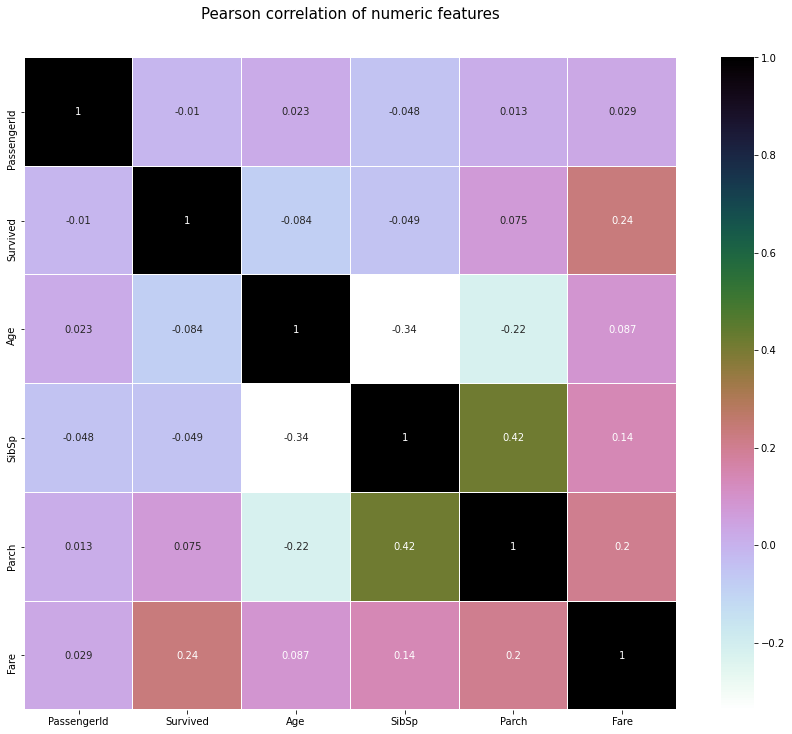

In [89]:
#numerical features

train_numeric = combined_cleaned["train"].select_dtypes(include=['float32','int16','int8','bool'])

colormap = plt.cm.cubehelix_r
plt.figure(figsize=(16,12))

plt.title('Pearson correlation of numeric features', y=1.05, size=15)
sns.heatmap(train_numeric.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

plt.show()

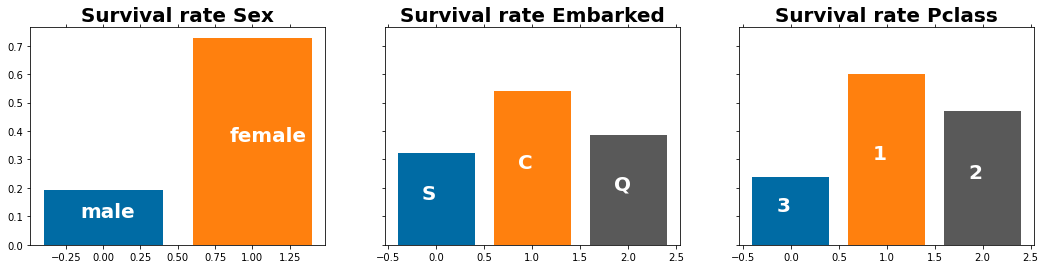

In [90]:
# category features# category features

#we do not count NaN categories
def survived_percent(categories,column):
    survived_list = []
    for c in categories.dropna():
        count = combined_cleaned["train"][combined_cleaned["train"][column] == c][column].count()
        survived = combined_cleaned["train"][combined_cleaned["train"][column] == c]["Survived"].sum()/count
        survived_list.append(survived)
    return survived_list    
   
category_features_list = ["Sex", "Embarked","Pclass"]
category_features = {}

for x in category_features_list:
    unique_values = combined_cleaned["train"][x].unique().dropna()
    survived = survived_percent(unique_values,x)
    category_features[x] = [unique_values, survived]



fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_grey = (89/255, 89/255, 89/255)
color=[cb_dark_blue,cb_orange,cb_grey]

font_dict = {'fontsize':20, 
             'fontweight':'bold',
             'color':"white"}

for i,cat in enumerate(category_features.keys()):
    number_categories = len(category_features[cat][0])
    axs[i].bar(range(number_categories), category_features[cat][1], color=color[:number_categories])
    axs[i].set_title("Survival rate " + cat ,fontsize=20, fontweight='bold' )
    for j,indx in enumerate(category_features[cat][1]):
        label_text = category_features[cat][0][j]
        x = j
        y = indx
        axs[i].annotate(label_text, xy = (x-0.15 ,y/2), **font_dict )

for i in range(3):
    axs[i].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    axs[i].patch.set_visible(False)

plt.show()

In [91]:
# filling NaN in "Embarked" and "Fare"
for i,data in combined_cleaned.items():
    data["Embarked"].fillna(value="S",inplace=True) # S is most popular value 
    mean_Fare = data["Fare"].mean()
    data["Fare"].fillna(value=mean_Fare,inplace=True)

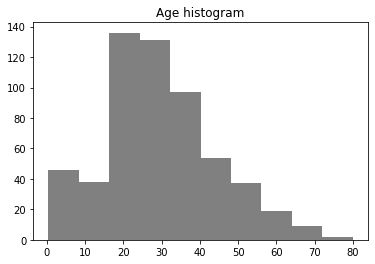

In [92]:
# filling NaN in "Age" 
fig, ax = plt.subplots( figsize=(6,4))
x = combined_cleaned["train"]["Age"].dropna()
hist, bins = np.histogram( x,bins=15)

#plot of histogram
ax.hist(x,  color='grey')
ax.set_title('Age histogram')
plt.show()

In [93]:
from random import choices

bin_centers = 0.5*(bins[:len(bins)-1]+bins[1:])
probabilities = hist/hist.sum()

#dictionary with random numbers from existing age distribution
for i,data in combined_cleaned.items():
    data["Age_rand"] = data["Age"].apply(lambda v: np.random.choice(bin_centers, p=probabilities))
    Age_null_list   = data[data["Age"].isnull()].index
    
    data.loc[Age_null_list,"Age"] = data.loc[Age_null_list,"Age_rand"]

In [94]:
from sklearn import preprocessing,tree
from sklearn.model_selection import GridSearchCV

tree_data = {}
tree_data_category = {}

for i,data in combined_cleaned.items():
    tree_data[i] = data.select_dtypes(include=['float32','int16','int8']).copy()
    tree_data_category[i] = data.select_dtypes(include=['category'])

    #categorical variables handling
    for column in tree_data_category[i].columns:
        le = preprocessing.LabelEncoder()
        le.fit(data[column])
        tree_data[i][column+"_encoded"] = le.transform(data[column])

In [95]:
#finding best fit with gridsearch
param_grid = {'min_samples_leaf':np.arange(20,50,5),
              'min_samples_split':np.arange(20,50,5),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = tree.DecisionTreeClassifier()
tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')

X =  tree_data["train"].drop("PassengerId",axis=1)
Y = combined_cleaned["train"]["Survived"]
tree_search.fit(X,Y)

print("Tree best parameters :",tree_search.best_params_)
print("Tree best estimator :",tree_search.best_estimator_ )
print("Tree best score :",tree_search.best_score_ )

Tree best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.0}
Tree best estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Tree best score : 0.7830922691217082


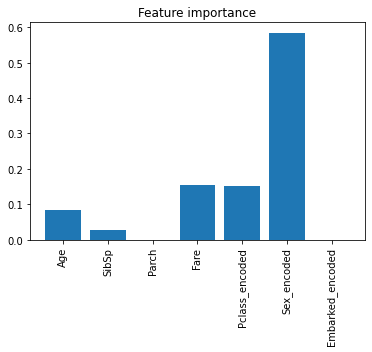

In [96]:
tree_best_parameters = tree_search.best_params_
tree_optimized = tree.DecisionTreeClassifier(**tree_best_parameters)
tree_optimized.fit(X,Y)

train_columns = list(tree_data["train"].columns)
train_columns.remove("PassengerId")
fig, ax = plt.subplots( figsize=(6,4))
ax.bar(range(len(X.columns)),tree_optimized.feature_importances_ )
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
ax.set_title("Feature importance")
plt.show()

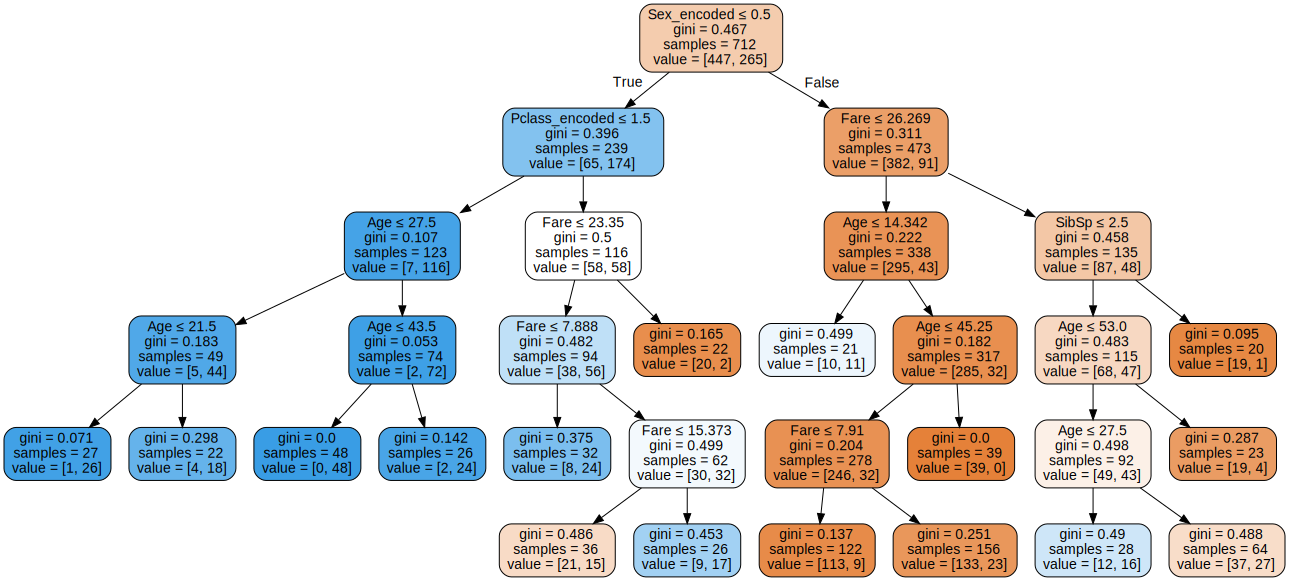

In [97]:
import graphviz 

dot_data = tree.export_graphviz(tree_optimized, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
graph

In [98]:
test_without_PId = tree_data["test"].drop("PassengerId",axis=1)
prediction_values = tree_optimized.predict(test_without_PId).astype(int)
prediction = pd.DataFrame({"PassengerId":tree_data["test"]["PassengerId"],
                           "Survived":prediction_values})

prediction.head()
prediction.to_csv("Titanic_tree_prediction.csv",index=False)

In [99]:
from sklearn.metrics import confusion_matrix

evaluation = {}
cm = {}


valid_without_PId = tree_data["valid"].drop("PassengerId",axis=1)
evaluation["tree"] = tree_optimized.predict(valid_without_PId).astype(int)
survival_from_data = combined_cleaned["valid"]["Survived"].astype(int)

print(survival_from_data.value_counts())

cm["tree"] = confusion_matrix(survival_from_data, evaluation["tree"])
cm["tree"] = cm["tree"].astype('float') / cm["tree"].sum(axis=1)[:, np.newaxis]

cm["tree"]

0    102
1     77
Name: Survived, dtype: int64


array([[0.79411765, 0.20588235],
       [0.20779221, 0.79220779]])

In [100]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=10,min_samples_leaf=20, max_depth=4,min_weight_fraction_leaf=0.1)
clf_forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.1, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
prediction_values_forest = clf_forest.predict(test_without_PId).astype(int)
prediction_forest = pd.DataFrame({"PassengerId":tree_data["test"]["PassengerId"],
                           "Survived":prediction_values_forest})

#prediction_forest.to_csv("Titanic_tree_prediction_forest.csv",index=False)

In [103]:
param_grid = {'n_estimators':np.arange(3,11,2),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}
clf = RandomForestClassifier()
forest_search = GridSearchCV(clf, param_grid, scoring='precision')

forest_search.fit(X,Y)

print("Forest best parameters :",forest_search.best_params_)
print("Forest best estimator :",forest_search.best_estimator_ )
print("Forest best score :",forest_search.best_score_ )

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

Forest best parameters : {'criterion': 'entropy', 'max_depth': 5, 'min_weight_fraction_leaf': 0.30000000000000004, 'n_estimators': 9}
Forest best estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=9, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
Forest best score : 0.9218559837728195


In [104]:
clf_forest = RandomForestClassifier(**forest_search.best_params_)
clf_forest.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.30000000000000004,
                       n_estimators=9, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [105]:
prediction_values_forest = clf_forest.predict(test_without_PId).astype(int)
prediction_forest = pd.DataFrame({"PassengerId":tree_data["test"]["PassengerId"],
                           "Survived":prediction_values_forest})

prediction_forest.to_csv("Titanic_tree_prediction_forest.csv",index=False)

[[1. 0.]
 [1. 0.]]


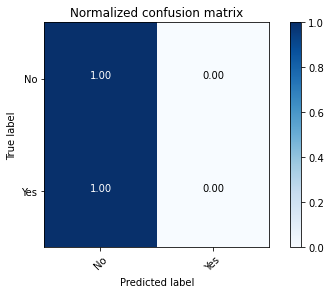

In [106]:
evaluation["forest"] = clf_forest.predict(valid_without_PId).astype(int)

cm["forest"] = confusion_matrix(survival_from_data, evaluation["forest"])
cm["forest"] = cm["forest"].astype('float') / cm["forest"].sum(axis=1)[:, np.newaxis]

cm["forest"]

plot_confusion_matrix(cm["forest"], classes=["No","Yes"], 
                      title='Normalized confusion matrix')

In [107]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X, Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [108]:
prediction_values_NaiveBayes = gnb.predict(test_without_PId).astype(int)
prediction_NaiveBayes = pd.DataFrame({"PassengerId":tree_data["test"]["PassengerId"],
                           "Survived":prediction_values_NaiveBayes})

[[0.82352941 0.17647059]
 [0.20779221 0.79220779]]


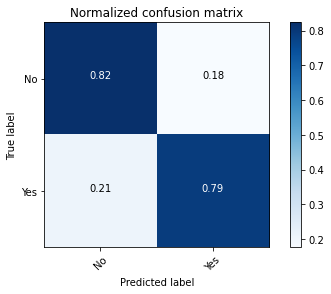

In [109]:
evaluation["NB"] = gnb.predict(valid_without_PId).astype(int)

cm["NB"] = confusion_matrix(survival_from_data, evaluation["NB"])
cm["NB"] = cm["NB"].astype('float') / cm["NB"].sum(axis=1)[:, np.newaxis]

cm["NB"]

plot_confusion_matrix(cm["NB"], classes=["No","Yes"], 
                      title='Normalized confusion matrix')

In [110]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [111]:
prediction_values_svm = clf_svm.predict(test_without_PId).astype(int)
prediction_svm = pd.DataFrame({"PassengerId":tree_data["test"]["PassengerId"],
                           "Survived":prediction_values_svm})

#prediction_svm.to_csv("Titanic_tree_prediction_svm.csv",index=False)

#16.
(a) AdaBoost 알고리즘에 관하여 설명하시오.

부스팅 알고리즘은 마지막으로 학습된 모델만 사용하는 것이 아니라 가중치를 갱신한 모든 모델을 같이 고려한다고 했습니다. 기존에서는 개별 모델에서 동일한 가중치를 주었다면 adaboost에서는 개별 모델에 가중치를 별도로 주는 개념이 추가된 방식입니다.

(b) 패션 MNIST 데이터를 사용하여(keras.datasets.fashion mnist 명령어 등으로 불러 올 수 있음.) 패션 MNIST 데이터 셋에 대하여 적절한 앙상블 방법을 사용하여 테스트 셋의 정확도를 높여 보자.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


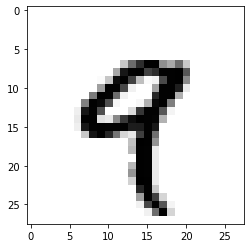

In [4]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
# flatten the images
n_samples = len(train_images)
data = train_images.reshape((n_samples, -1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, train_labels, test_size=0.3, shuffle=False)

In [6]:
decision_tree = DecisionTreeClassifier(random_state = 42)
random_forest = RandomForestClassifier(random_state = 42)

In [11]:
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
print('Decision Tree score:', accuracy_score(y_test, y_pred_dt))
print('Random Forest score:', accuracy_score(y_test, y_pred_rf))

Decision Tree score: 0.8657777777777778
Random Forest score: 0.9651111111111111


In [13]:
from xgboost import XGBClassifier
xgbclf = XGBClassifier()
xgbclf.fit(X_train, y_train)
y_pred_xg = xgbclf.predict(X_test)
print('XGboost:', accuracy_score(y_test, y_pred_xg))

XGboost: 0.9338333333333333
